
# Explorando MNIST y redes neuronales profundas

El propósito de este documento es ayudarlo a aprender sobre redes neuronales profundas y explorar cómo el cambio de la arquitectura de una red neuronal afecta el rendimiento de la red. 

Antes de poder construir redes neuronales, necesitamos importar algunas cosas de Keras y preparar nuestros datos. El siguiente código extrae el conjunto de datos MNIST, proporcionado por Keras, y corvierte las imágenes de 28x28 píxeles en un vector con una longitud 784. Además, modifica las etiquetas de un valor numérico 0-9 a un vector *one-hot encoded*.

*One-hot encoding* hace referencia a un grupo de bits entre los cuales las combinaciones validas de valores son solo aquellas con un solo bit alto (1) y todas las demás bajas (0).

<center><img src="https://i.imgur.com/wKtY1Og.png" alt="drawing" width="400"/>





In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense #capas fully connected
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import numpy as np

from keras.utils import to_categorical ##############################

print(tf. __version__)
# Preparar el conjunto de datos
# Configurar la división del entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Hacer una copia antes de convertir a 1D 
# esta copia se usa para mostrar las imágenes
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)  #vector de 784, flattening 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convierte vectores de clase en matrices de clases binarias (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_test)
print(x_train.shape) #m=num de ejemplos = 60 000, n=784 (features)
print(x_test.shape)

2.9.1
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)
(10000, 784)


## Un vistazo a algunos dígitos al azar

Es bueno tener una idea del conjunto de datos con el que estamos trabajando. Ejecute este código varias veces para ver los nuevos dígitos seleccionados al azar del conjunto de entrenamiento. 

[5, 4, 3, 2]


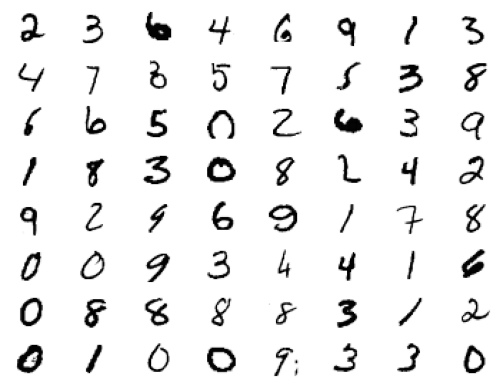

In [2]:

#itereamos desde i=0 hasta 63. De manera general range(start, stop[, step])
print(list(range(5,1,-1)))
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## **0.1 Primera red (3 puntos)**

Aquí hay una primera red simple para resolver MNIST. Tiene una sola capa oculta con 32 nodos.  

1.   *La red tiene un total de 25450 parámetros entrenables. Demuestre cómo Keras calcula el número de parámetros entrenables en esta arquitectura*
2.   *Qué significa `None` en la forma de salida (output shape) que se muestra como `(None,32)`*?
3. *cuál es la función de activación softmax y su relación con la sigmoide?*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


2023-03-20 09:29:09.520260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


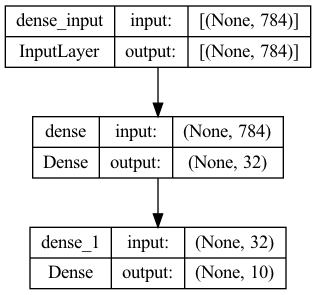

In [3]:
model = Sequential()

# La capa de entrada requiere el parámetro especial input_shape que debe 
# coincidir con la forma de nuestros datos de entrenamiento.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,))) #Input and Hidden Layer
model.add(Dense(units=num_classes, activation='softmax')) #output Layer. Si num_classes = 2 (pos y neg): model.add(Dense(units=1, activation='sigmoid')) equivalente model.add(Dense(units=2, activation='softmax'))  
model.summary() # REPRESENTAR
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **0.2 Entrenar y evaluar la red (7 puntos)**

Este código entrena y evalúa el modelo que definimos anteriormente. También usa `matplotlib` y el objeto `history` proporcionado por Keras, que rastrea cómo se comporta el modelo a través de su entrenamiento. Observe que usamos el objeto `history` para trazar la precisión del entrenamiento y la precisión de la validación a lo largo del tiempo (*epochs*).



1.   *En el siguiente código, la función de costo o pérdida (loss function) está definida como `'categorical_crossentropy'`. Consulte cuál es la forma matemática de esta función y explique sus parámetros.*
2.   *Cuál es la diferencia entra la función de costo de entropía cruzada (Cross-Entropy loss) con respecto a la función de costo definida para la regresión logística?*
3. *Consulte las diferencias entre minibatch gradient descent, batch gradient descent y Stochastic gradient descent.*
4. *Según lo consultado en el punto anterior, qué tipo de gradient descent (batch, minibatch o stochastic) describe la función de costo para la red neuronal estudiada en clase? Justifique su respuesta.*
5. *Explique qué significa una época en una red neuronal (epoch)*
6. *Explique qué es el tamaño del batch de una red neuronal.*
7. *Cuál es la diferencia entre tamaño del batch y época?*



Epoch 1/200
422/422 [==============================] - 2s 3ms/step - loss: 1.3714 - accuracy: 0.6540 - val_loss: 0.9304 - val_accuracy: 0.8337
Epoch 2/200
422/422 [==============================] - 1s 2ms/step - loss: 0.8688 - accuracy: 0.8201 - val_loss: 0.6992 - val_accuracy: 0.8747
Epoch 3/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.8526 - val_loss: 0.5751 - val_accuracy: 0.8913
Epoch 4/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5911 - accuracy: 0.8693 - val_loss: 0.4867 - val_accuracy: 0.9045
Epoch 5/200
422/422 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.8788 - val_loss: 0.4374 - val_accuracy: 0.9072
Epoch 6/200
422/422 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.8859 - val_loss: 0.4031 - val_accuracy: 0.9143
Epoch 7/200
422/422 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8915 - val_loss: 0.3795 - val_accuracy: 0.9125

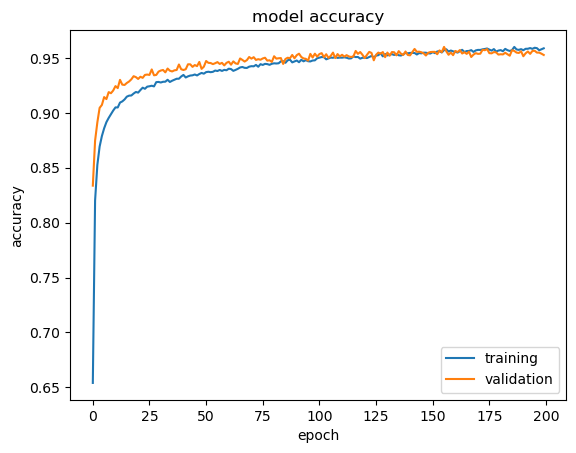

Test loss: 0.185
Test accuracy: 0.942
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.008 0.002 0.974 0.009 0.    0.001 0.006 0.    0.    0.   ]


In [4]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy']) #LOSS = COST function. EVALUAR.
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=True, validation_split=.1) #fit = OPTIMIZAR.
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #evalua en la última época, no necesariamente la mejor. Ver checkpoints y monitors.
mypredictions  = model.predict(x_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
print(f'Shape of my predictions (test set): {mypredictions.shape}')
yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
mypidx = mypredictions[1,:]
np.set_printoptions(precision=3, suppress=True)
print(f'First prediction for number {yidx[1]}, probabilities: {mypidx}')

## Algunas Ayudas

Hay un par de cosas que haremos repetidamente en este notebook:

* Construir un modelo, y
* Evaluar ese modelo.


Estas funciones nos ayudarán a comparar "manzanas con manzanas", ya que podemos estar seguros de que cuando llamamos a `create_dense` y `evaluate` nuestros modelos y régimen de entrenamiento utilizarán los mismos **hiperparámetros**. Ambos usan algunas de las variables declaradas anteriormente y, por lo tanto, ambos están explícitamente destinados a trabajar con el conjunto de datos MNIST.

`create_dense` acepta una matriz del tamaños de la  capa y devuelve un modelo Keras de una red neuronal completamente conectada con los tamaños de capa especificados. Por ejemplo, `create_dense ([32, 64, 128])` devolverá una red neuronal profundamente conectada con tres capas ocultas, la primera con 32 nodos, la segunda con 64 nodos y la tercera con 128 nodos.

`create_dense` usa la variable `image_size` declarada anteriormente, lo que significa que asume que los datos de entrada serán un vector con 784 unidades. Todas las capas ocultas usan la función de activación sigmoid, excepto la capa de salida, que usa softmax.

`evaluate` imprime un resumen del modelo, entrena el modelo y luego imprime la pérdida y la precisión. Esta función siempre ejecuta 5 épocas de entrenamiento y utiliza un *tamaño de batch* fijo de 128 entradas por *batch*. También utiliza los datos MNIST extraídos de Keras que procesamos anteriormente.



In [5]:
def create_dense(layer_sizes):
    model = Sequential()
    #from tensorflow.keras import regularizers
    #kernel_regularizer=regularizers.L2(1e-4)
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))#aqui anidir kernel_regularizer

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid')) #aqui aniadir kernel_regularizer

    model.add(Dense(units=num_classes, activation='softmax'))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

def evaluate(model, batch_size=128, epochs=5, verbose=False):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) #accuracy = 1 - error
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=verbose) #entrenando 
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #YA NO ENTRENA PERO EVALUA EN EL CONJ DE TEST.
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Shape of my predictions (test set): {mypredictions.shape}')
    yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
    mypidx = mypredictions[1,:]
    np.set_printoptions(precision=3, suppress=True)
    print(f'First prediction for number {yidx[1]}, probabilities: {mypidx}')

# Ejemplo de uso de las funciones creadas
A continuacion se muestra un ejemplo de como usar las anteriores funciones.
El lazo `for` genera 2 iteraciones. En la primera iteración, layers = 1 y se genera un modelo con 2 capas de 32 nodos cada una. En la segunda iteración, layers = 2 y se genera un modelo con 4 capas de 32 nodos debido a que se repite dos veces la matriz [32, 32] * 2 = [32, 32, 32, 32].

Para la evaluacion del modelo se usa la funcion `evaluate` con los parametros batch_size=128 y epochs=10.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 2.2007 - accuracy: 0.3273 - val_loss: 2.0720 - val_accuracy: 0.5320
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 1.9744 - accuracy: 0.5771 - val_loss: 1.8520 - val_accuracy: 0.6735
Epoch 3/10
422/422 [==========

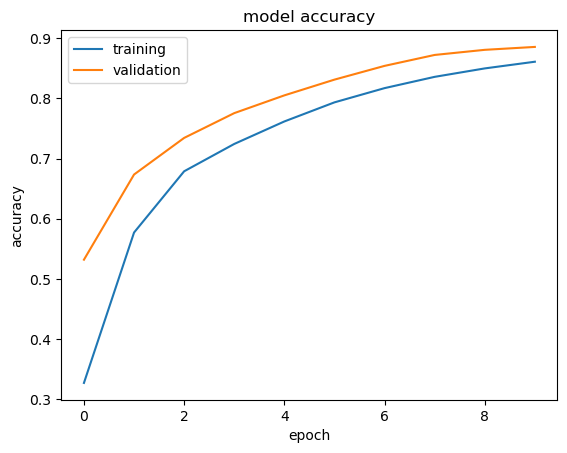


Test loss: 0.691
Test accuracy: 0.872
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.008 0.002 0.974 0.009 0.    0.001 0.006 0.    0.    0.   ]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                         

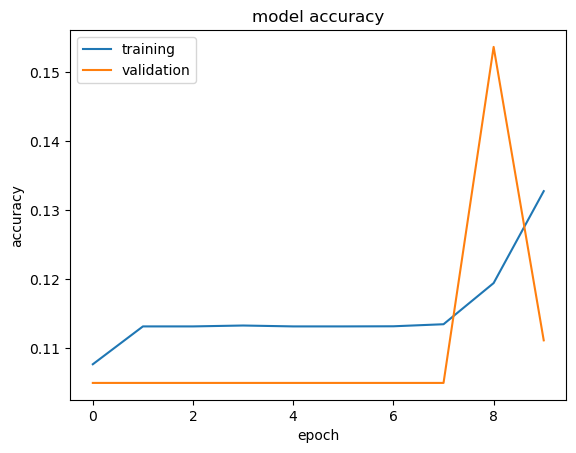


Test loss: 2.27
Test accuracy: 0.118
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.008 0.002 0.974 0.009 0.    0.001 0.006 0.    0.    0.   ]


In [6]:
for layers in [1, 2]:
    #print(i)
    model = create_dense([32, 32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

#EQUIVALENTE del for
#model = create_dense([32, 32]) #2 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)

#model = create_dense([32, 32, 32, 32]) #2 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)


## **1. Comparar redes más complejas (4 puntos)**


*  Ahora entrene y evalúe modelos con **diferente números de capas** ocultas. Todas las capas ocultas deben tener 32 nodos. El primer modelo tiene 1 capa oculta, el segundo 2 ... hasta cuatro capas.  Analice la exactitud obtenida en cada caso.

*Evalue el modelo con los parametros por defecto*





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
422/422 [=============================

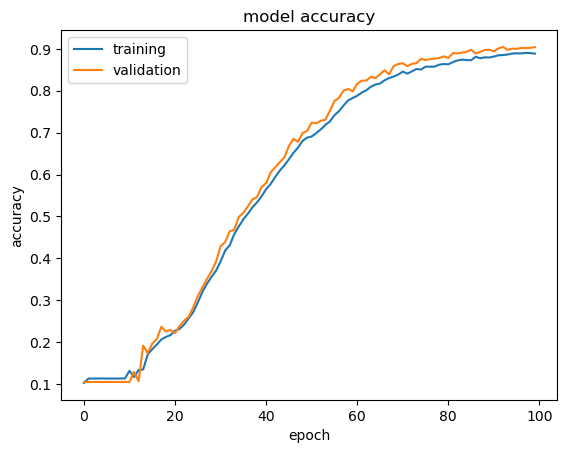


Test loss: 0.431
Test accuracy: 0.889
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.008 0.002 0.974 0.009 0.    0.001 0.006 0.    0.    0.   ]


In [7]:

#ESCRIBA SU CÓDIGO AQUÍ.
# Este es solo un ejemplo para 4 capas ocultas de 32 nodos cada una.
model = create_dense([32, 32, 32, 32]) #2 hidden layers de 32 nodos cada una
evaluate(model, batch_size=128, epochs=100, verbose=True)

## **2. Redes más profundas tardan más en entrenar (4 puntos)**

Segun lo observado en el ejemplo anterior, las redes más profundas toman más tiempo para entrenar. Esto tiene que ver con la retropropagación (backpropagation), el descenso de gradiente y la forma en que funcionan los algoritmos de optimización: esos detalles están más allá del alcance de este ejercicio.
Sin embargo, tenga en cuenta lo que sucede cuando dejamos que la red anterior de 3 capas ocultas, que tenía un rendimiento mediocre, entrene por más tiempo. Para esto, realice lo siguiente

*  Cree una red con 3 capas ocultas de 32 nodos ([32, 32, 32]) pero esta vez entrene durante 40 épocas. Qué sucedió? Comente sus resultados.

Mantenga el resto de parámetros por defecto. Puede usar la opción `verbose=True` para llamar a la función `evaluate` para ver en pantalla los resultados por época. Discuta sus resultados.


In [8]:
#ESCRIBA SU CÓDIGO AQUÍ.

### **3. Comparación del número de nodos (i.e., unidades o neuronas) por capa (4 puntos)**

Otra forma de incrementar la complejidad es agregar más nodos **(i.e., unidades o neuronas)** a cada capa oculta. Cree varias redes neuronales de una capa, con cada vez más nodos en esa capa. Pruebe con 32, 64, 128, 256, 512, 1024 y 2048 nodos. Comente sus resultados.

Note que esta vez al crear el modelo usando `create_dense`, el lazo `for` iterara sobre el numero de nodos [32, 64, 128, 256, 512, 1024, 2048]

In [9]:
#ESCRIBA SU CÓDIGO AQUÍ.

## **4. Más nodos y más capas (4 puntos)**

Ahora que hemos visto la cantidad de nodos y la cantidad de capas en un contexto aislado, veamos qué sucede cuando combinamos estos dos factores.

*   4.1 Cree un código que genere modelos con un numero de capas que se incrementan de 1 a 5. Cada capa debe tener 32 nodos. Entrene el modelo con 10 épocas por cada capa, i.e., `epochs=10*layers`. De este modo, el primero modelo tendrá 1 capa de 32 nodos y entrenará durante 10 épocas, el segundo modelo tendrá 2 capas de 32 nodos y entrenará durante 20 épocas y así sucesivamente.
*   4.2 Repita el código anterior pero esta vez cada capa tendrá 128 nodos.
*   4.3 Repita el código anterior pero esta vez cada capa tendrá 512 nodos.

Discuta sus resultados.

In [10]:
#PARTE 4.1 ESCRIBA SU CÓDIGO AQUÍ.

In [11]:
#PARTE 4.2 ESCRIBA SU CÓDIGO AQUÍ.

In [12]:
#PARTE 4.3 ESCRIBA SU CÓDIGO AQUÍ.

## **5. Mas capas, más entrenamiento, Batch más pequeño (4 puntos)**

A veces, los modelos con varias capas necesitan no solo entrenarse durante más tiempo, sino que también necesitan más "correcciones" por época. Al disminuir el tamaño del *batch*, podemos aumentar el número de "correcciones"  que obtiene un modelo para mejorar su desempeño. También nos aseguramos de que obtenga información más detallada ajustando el error en un *batch* más pequeño.

En este caso, podemos forzar un modelo que no aprendió bien, como el modelo de la sección anterior con 5 capas ocultas de 32 nodos, para lograr una precisión moderadamente respetable. Aunque dicho rendimiento aún no sea excelente, vale la pena mencionar que con paciencia y potencia computacional podemos hacer que un modelo que parezca malo tenga un rendimiento decente. 

Con este objetivo, Cree un modelo que tenga 5 capas de 32 nodos (i.e., similar al de la sección anterior que tuvo rendimiento pobre) y entrénelo durante 50 épocas pero esta vez con un tamaño de batch de 16 (batch_size=16).Discuta sus resultados y compare con el modelo de 5 capas ocultas de 32 nodos de la sección anterior. 

***Considere que este experimento puede demorar en ejecutar***

In [13]:
#ESCRIBA SU CÓDIGO AQUÍ.

# **6. Regularización en Redes Neuronales (4 puntos)**

Como se estudió en clase, la regularización permite obtener modelos que pueden generalizar de manera más precisa en un conjunto de test.

1. Investigue cómo añadir un término de regularización igual al estudiado en clase.
2. Modifique la función `create_dense`para que todas sus capas (i.e., inclusive la capa de salida) incluyan este término de regularización. Observe que Keras requiere que se especifique en cada capa dicho término. Fije el valor del parámetro de regularización en 1e-4.
3. Repita la sección 2, 3 y 4.2 usando el término de regularización

Discuta sus resultados

Tip: al definir el modelo use el parámetro `kernel_regularizer` (variable lambda en la teoría). Ver ayuda en [aquí](https://keras.io/api/layers/regularizers/)








# **7. Comparación (2 puntos)**

Resuma todos sus resultados en una tabla donde se verifique la precisión en el conjunto de entrenamiento, validación y test para las diferentes arquitecturas entrenadas con los hiperparámetros modificados (i.e., # de epochs, batch size, # de nodos por capa oculta, # capas ocultas, con y sin regularización).

Discuta sus resultados.

# **8. Conclusiones**
En esta sección concluya las principales observaciones de sus experimentos.

# **9. Bibliografía**

En caso de ser necesario, incluya la bibliografía utilizada en formato IEEE. No olvide citar en el texto sus referencias donde sea pertinente.